# Lab 8: Differential equations

MTH 308: Applied Linear Algebra <br>
Spring 2022

Lab parts: 

- Part 1: Solving a single differential equation, Exercise 1
- Part 2: Linear system of equations, Exercise 2
- Part 3: Approximate solutions to nonlinear systems, Exercise 3



## Instructions

Run each of the coding cells. For example cells, understand the commands and check that the outputs make sense. For exercise cells, write your own code where indicated to generate the correct output.

<u>Submission:</u> Complete the following notebook in order. Once done, print the notebook and save as an HTML file. Upload your submission to the Canvas course page.

<u>Rubric:</u> 15 total points, 3 points to running example cells and saving outputs, 4 points per exercise block with correct output saved.

<u>Deadline:</u> Monday at midnight after the lab is assigned.

## Part 1: Solving a single differential equation, Exercise 1

Here we explore the concept of a differential equation by
- Formulation via basic calculus
- Finding approximate solutions using tangent line approximation
- Finding approximate solutions using an R library

#### Single differential equation

A differential equation relates an unknown function $x(t)$ of time $t$ with its derivatives. This is written in general as below.
$$
\begin{cases}
\frac{dx}{dt} = f(t,x), & t>0 \\
x(0) = x_0
\end{cases}
$$
Here $f(t,x(t))$ is some given right hand side function and constant $x_0$ is a given initial condition.

There are many calculus techniques for solving such equations, but depending on right hand side $f$, it may be difficult or even impossible to solve for $x(t)$. In this case, approximate solutions are the best option.

For more details on these equations, read https://en.wikipedia.org/wiki/Ordinary_differential_equation.

#### Example 1: Simple population growth

Here we model a population $x(t)$ growing over time $t$. Assuming the populate grows (or decays) at a rate proportional to its size, we have the following differential equation.
$$
\begin{cases}
\frac{dx}{dt} = rx, & t>0 \\
x(0) = x_0
\end{cases}
$$
Here $r$ is the constant growth rate and $x_0$ is the initial population. For example, if $r=0.5$ and $x_0=200$, we have
$$
\begin{cases}
\frac{dx}{dt} = 0.5x, & t>0 \\
x(0) = 200
\end{cases}
$$
This example can be solved exactly by hand with solution
$$
x(t) = 200e^{0.5t}.
$$
Suppose we could not solve this problem by hand. A simple approximation idea is to approximate the derivative (tangent line slope) by a difference quotient (secant line slope)
$$
\frac{dx}{dt} \approx \frac{x(t+\Delta t)-x(t)}{\Delta t}
$$
where $\Delta t$ is some small stepsize. Introducing some notation
$$
t_0, \quad t_1 = t_0+\Delta t, \quad \dots \quad, t_k = t_0+\Delta t, \quad\quad\quad x_k = x(t_k)
$$
and substituting into the differential equation, we have the following approximation scheme.
$$
\frac{x_{k+1}-x_k}{\Delta t} = 0.5 x_k, \quad k = 0,1,2,\dots
$$
which simplifies to
$$
x_{k+1} = \Delta t 0.5 x_k + x_k, \quad k = 0,1,2,\dots
$$
In the below coding block, this tangent line approximation scheme is illustrated in comparison to the exact solution. For more details on this approximation approach, see https://en.wikipedia.org/wiki/Euler_method

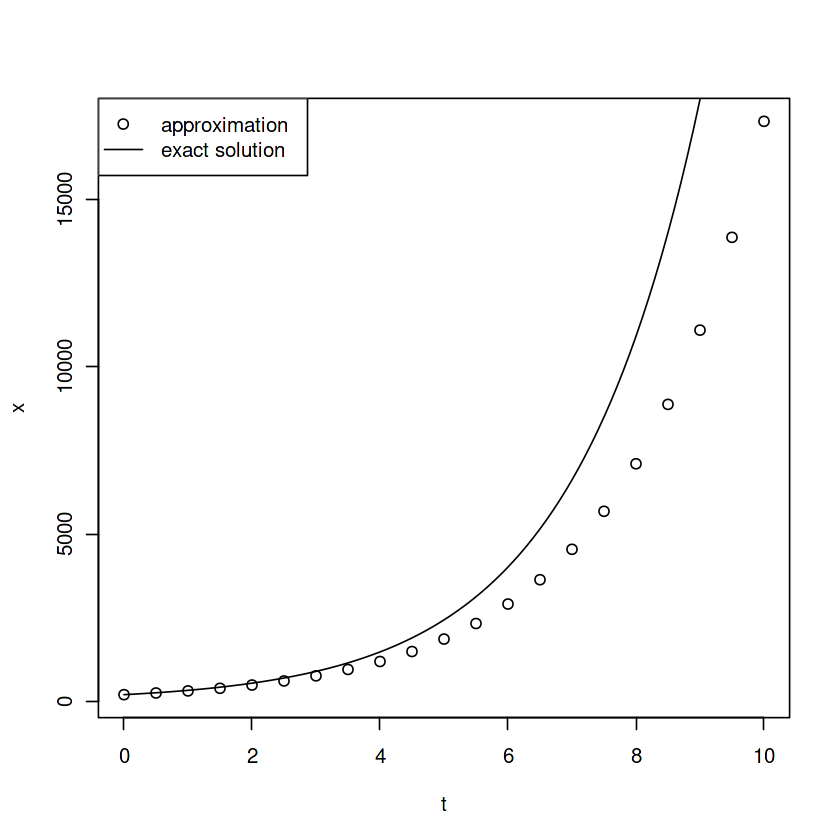

In [1]:
##################
# EXAMPLE CELL
# There is no need to code anything here
##################

RHSfunction <- function(x){ # right hand side of differential equation
    return(0.5*x)
}

deltaT <- 0.5 # time stepsize
endTime <- 10 # end time to compute to
n <- endTime/deltaT # number of time points
t <- seq(0,endTime,by=deltaT) # array of all time values

x0 <- 200 # initial condition

x <- c()
x[1] <- x0

for (k in c(1:n)){ # iterative approximation scheme (Euler's method)
    x[k+1] <- deltaT*RHSfunction(x[k]) + x[k]
}

plot(t,x) # plot approximate solution
curve(200*exp(0.5*x), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

Our approximate solution is pretty good initially, but the error increases as $t$ goes on. To improve, we have two options:
- Decrease $\Delta t$ so error remains smaller (feel free to try this in the above code block)
- Improve the approximation method to something better than secant lines (implemented below in code block)

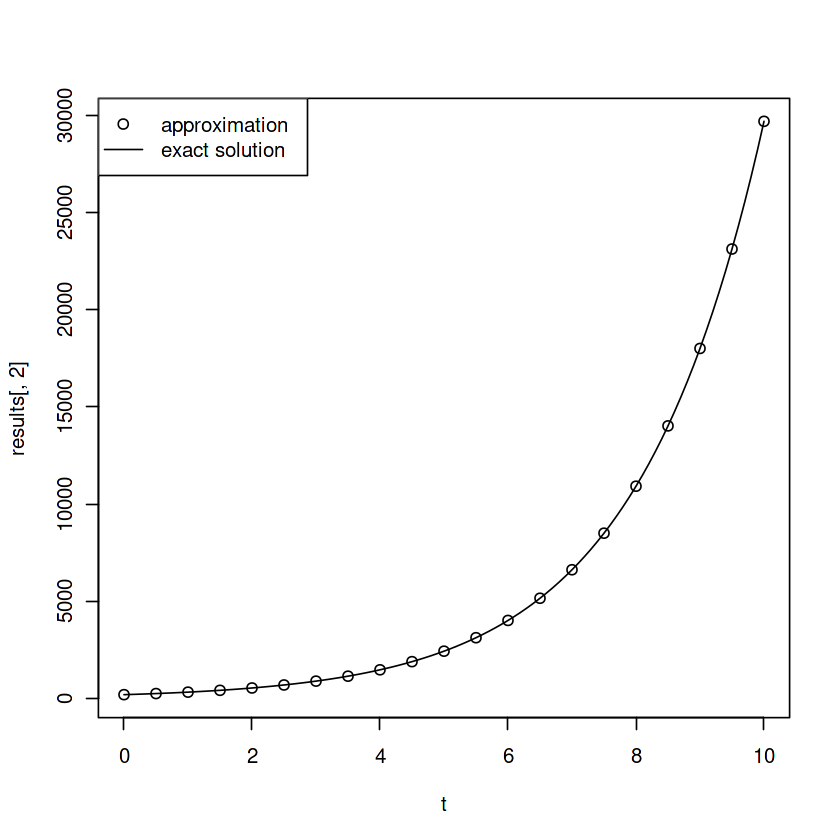

In [2]:
##################
# EXAMPLE CELL
# There is no need to code anything here
##################

library(deSolve) # differential equation solver R package

RHSfun <- function(t, y, parms){ # right hand side of differential equation, formatted to work with deSolve routine
    with(as.list(c(y, parms)),{
        dx <- r*x
        return(list(dx))
    })
}

deltaT <- 0.5 # time stepsize
endTime <- 10 # end time
t <- seq(0,endTime,by=deltaT) # t values

y <- c(x = 200) # initial condition
parms <- c(r = 0.5) # differential equation growth rate as a parameter
results <- ode(y = y, times = t, func = RHSfun, parms = parms) # ode solver routine

plot(t,results[,2]) # plot approximate solution
curve(200*exp(0.5*x), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot


Our approximate solution is now nearly identical to the exact solution while using the same stepsize $\Delta t$ as before. For details on this R library, see https://cran.r-project.org/web/packages/deSolve/vignettes/deSolve.pdf

#### Exercise 1: Logistic population growth

We modify the above population growth model by adding a population maximum threshold called the carry capacity.
$$
\begin{cases}
\frac{dx}{dt} = rx\left(1- \frac{x}{K} \right), & t>0 \\
x(0) = x_0
\end{cases}
$$
Here $r$ is the constant growth rate, $K$ is the carry capacity, and $x_0$ is the initial population. For example, if $r=0.5$, $K=500$, and $x_0=200$, we have
$$
\begin{cases}
\frac{dx}{dt} = 0.5x\left(1- \frac{x}{500} \right), & t>0 \\
x(0) = 200
\end{cases}
$$
This equation too can be solved by hand. For the exact solution formula, see https://en.wikipedia.org/wiki/Logistic_function#In_ecology:_modeling_population_growth.

In the below coding block, implement the secant line approximation (Euler's method) for this problem. Plot the approximate solution with the exact solution for comparison. You should consider each of the following initial populations.

- $x(0)=50, 200, 500, 700$



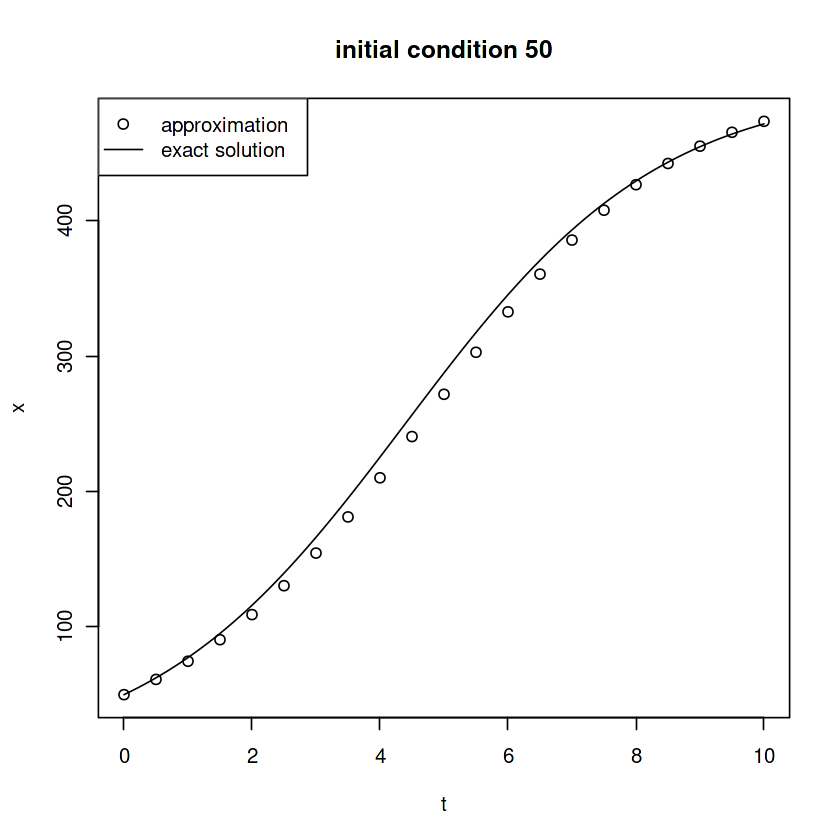

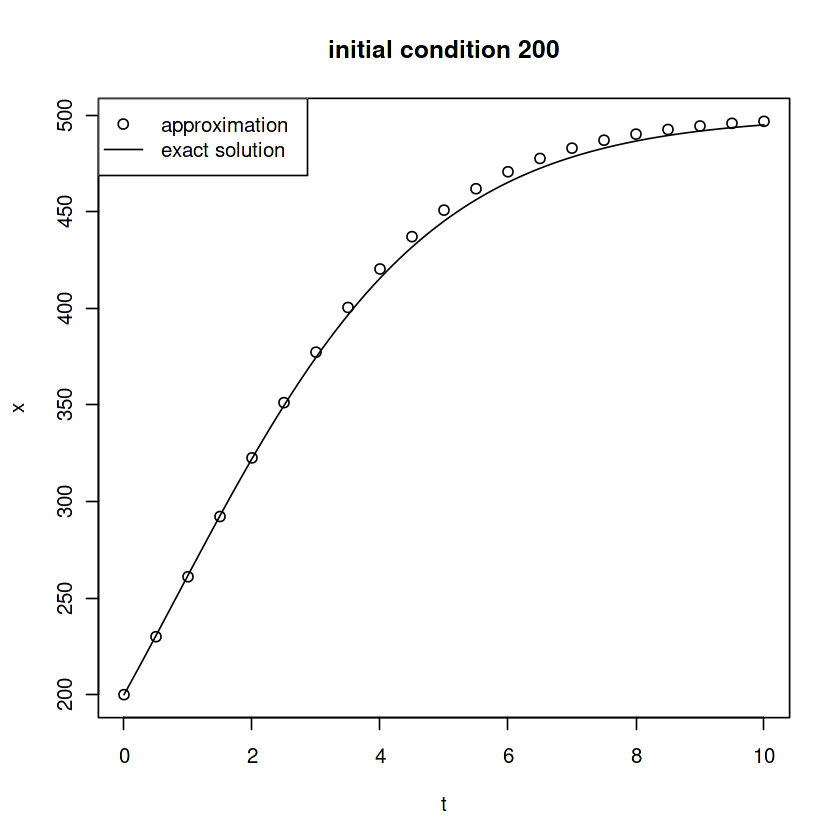

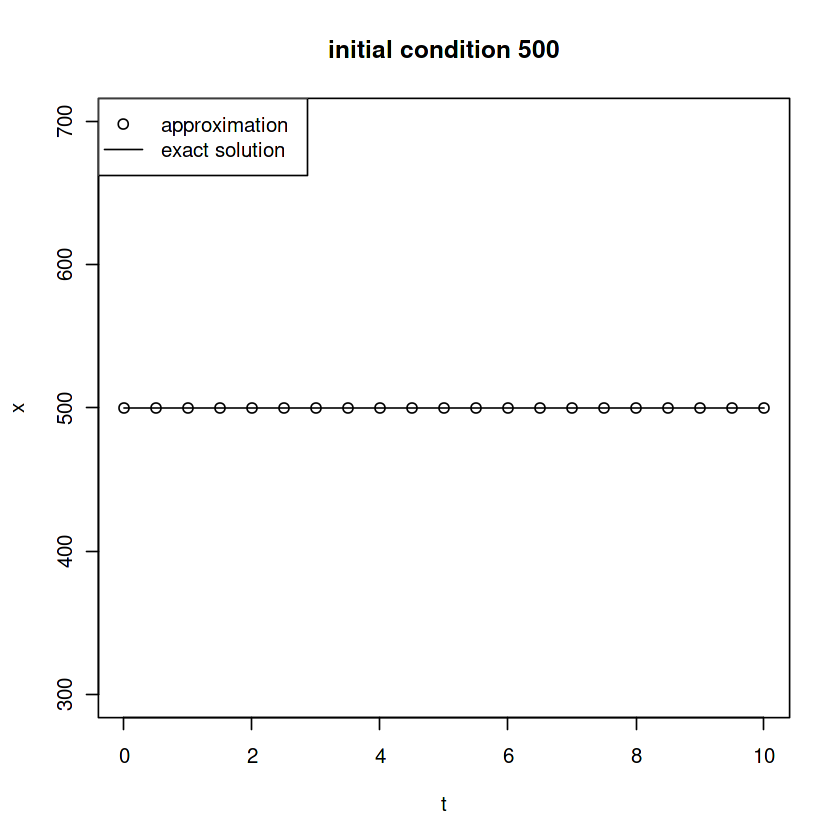

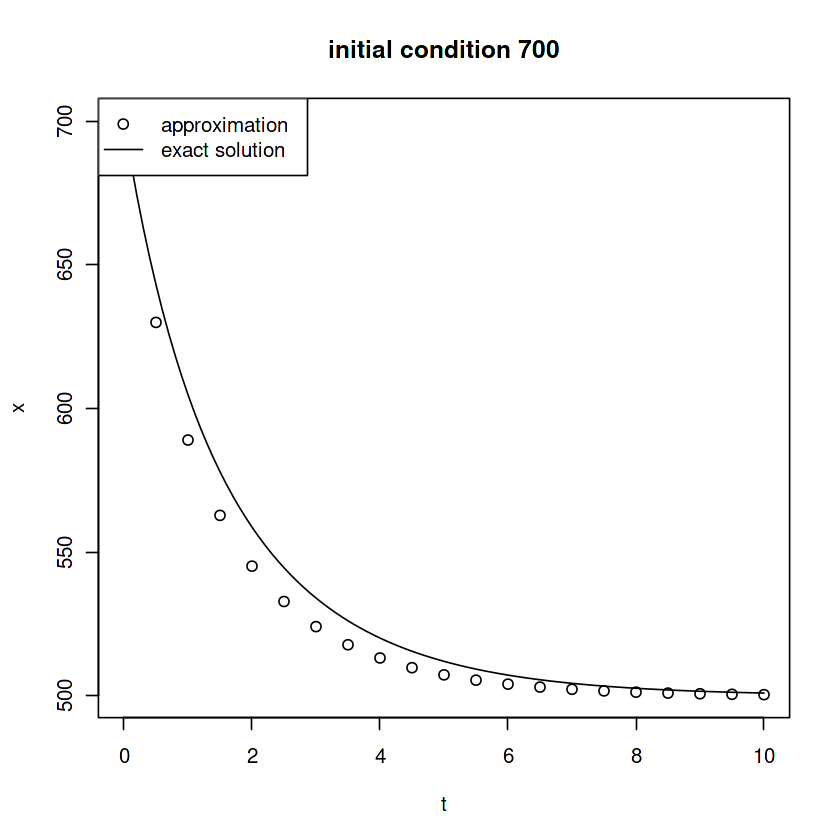

In [3]:
##################
# EXERCISE CELL
##################

##################
# insert your code here


RHSfunction <- function(x){ # right hand side of differential equation
    return(0.5*x*(1-x/500))
}

deltaT <- 0.5 # time stepsize
endTime <- 10 # end time to compute to
n <- endTime/deltaT # number of time points
t <- seq(0,endTime,by=deltaT) # array of all time values

#######################
x0 <- 50 # initial condition

x <- c()
x[1] <- x0

for (k in c(1:n)){ # iterative approximation scheme (Euler's method)
    x[k+1] <- deltaT*RHSfunction(x[k]) + x[k]
}

plot(t,x) # plot approximate solution
title(paste("initial condition",toString(x0)))
curve(500/(1+(500-x0)/x0*exp(-0.5*x)), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

##################
#######################
x0 <- 200 # initial condition

x <- c()
x[1] <- x0

for (k in c(1:n)){ # iterative approximation scheme (Euler's method)
    x[k+1] <- deltaT*RHSfunction(x[k]) + x[k]
}

plot(t,x) # plot approximate solution
title(paste("initial condition",toString(x0)))
curve(500/(1+(500-x0)/x0*exp(-0.5*x)), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

##################
#######################
x0 <- 500 # initial condition

x <- c()
x[1] <- x0

for (k in c(1:n)){ # iterative approximation scheme (Euler's method)
    x[k+1] <- deltaT*RHSfunction(x[k]) + x[k]
}

plot(t,x) # plot approximate solution
title(paste("initial condition",toString(x0)))
curve(500/(1+(500-x0)/x0*exp(-0.5*x)), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

##################
#######################
x0 <- 700 # initial condition

x <- c()
x[1] <- x0

for (k in c(1:n)){ # iterative approximation scheme (Euler's method)
    x[k+1] <- deltaT*RHSfunction(x[k]) + x[k]
}

plot(t,x) # plot approximate solution
title(paste("initial condition",toString(x0)))
curve(500/(1+(500-x0)/x0*exp(-0.5*x)), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

##################

In the below coding block, implement the R package approximation (deSolve) for this problem. Plot the approximate solution with the exact solution for comparison. You should consider each of the following initial populations.
- $x(0)=50, 200, 500, 700$

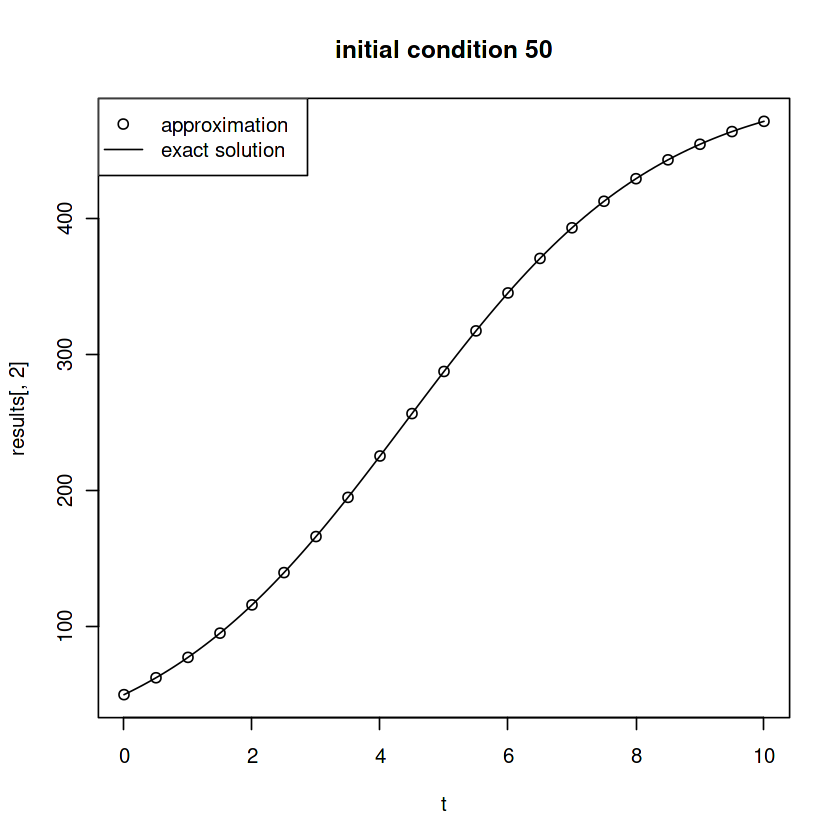

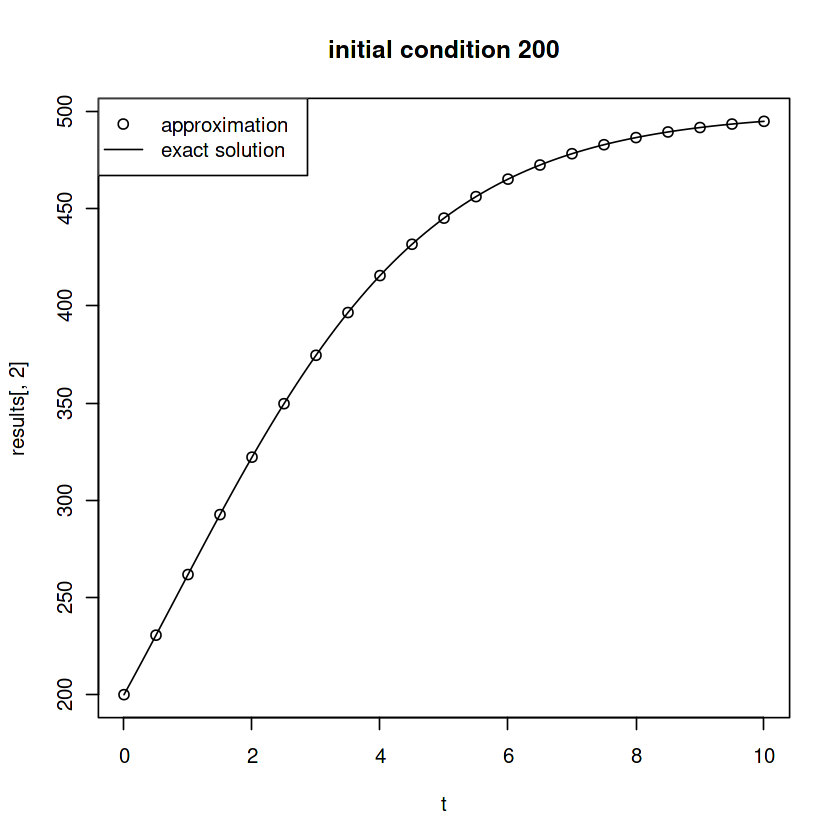

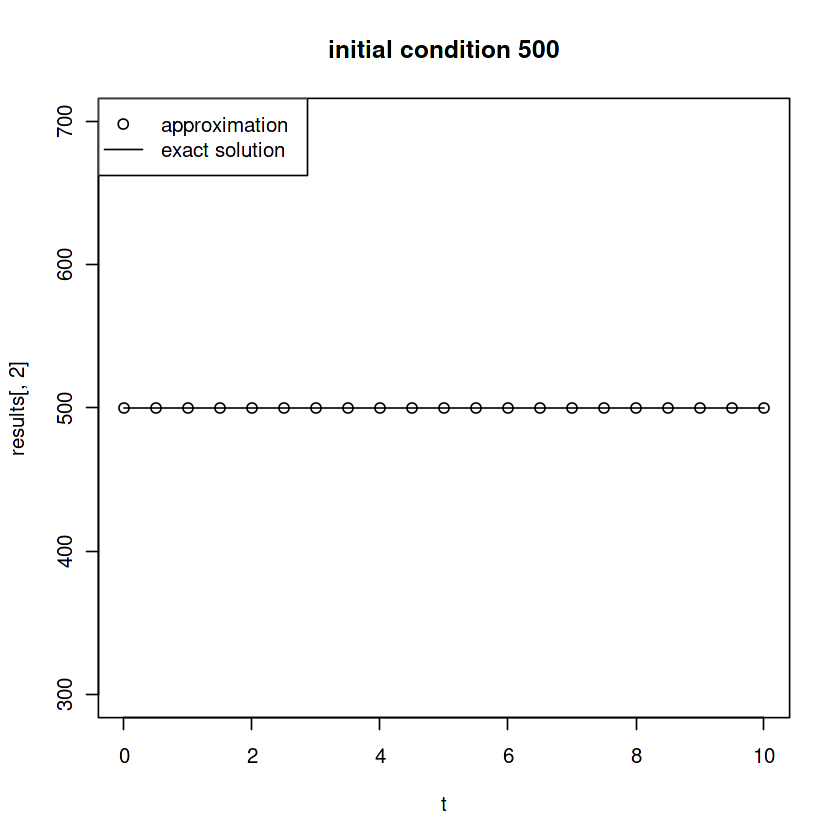

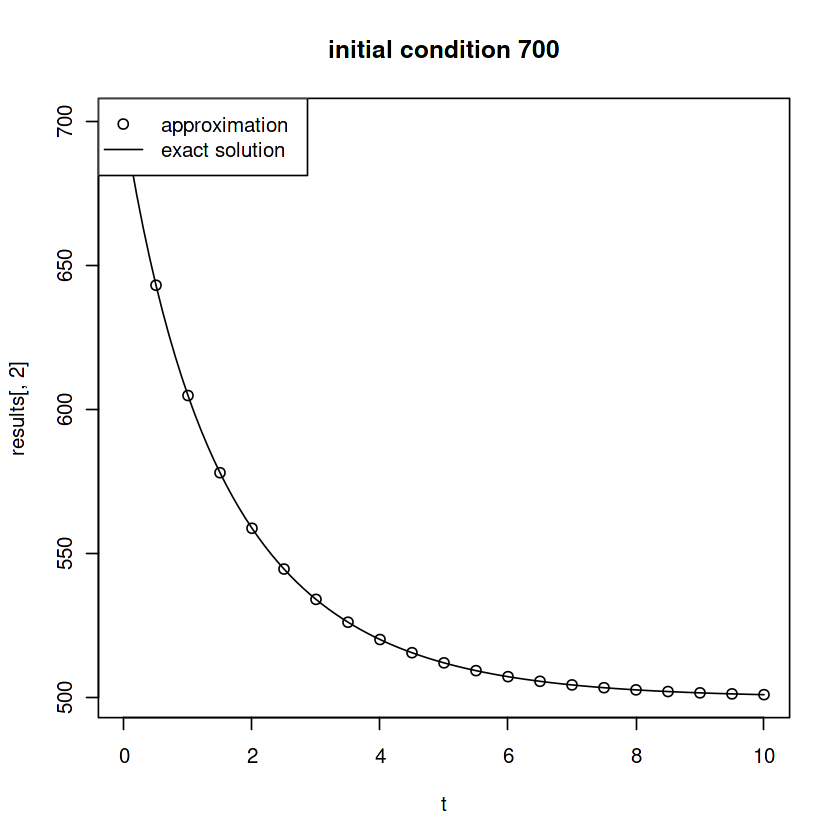

In [4]:
##################
# EXERCISE CELL
##################

##################
# insert your code here


RHSfun <- function(t, y, parms){ # right hand side of differential equation, formatted to work with deSolve routine
    with(as.list(c(y, parms)),{
        dx <- r*x*(1-x/500)
        return(list(dx))
    })
}

deltaT <- 0.5 # time stepsize
endTime <- 10 # end time
t <- seq(0,endTime,by=deltaT) # t values

##################
x0 <- 50
y <- c(x = x0) # initial condition
parms <- c(r = 0.5) # differential equation growth rate as a parameter
results <- ode(y = y, times = t, func = RHSfun, parms = parms) # ode solver routine

plot(t,results[,2]) # plot approximate solution
title(paste("initial condition",toString(x0)))
curve(500/(1+(500-x0)/x0*exp(-0.5*x)), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

##################

x0 <- 200
y <- c(x = x0) # initial condition
parms <- c(r = 0.5) # differential equation growth rate as a parameter
results <- ode(y = y, times = t, func = RHSfun, parms = parms) # ode solver routine

plot(t,results[,2]) # plot approximate solution
title(paste("initial condition",toString(x0)))
curve(500/(1+(500-x0)/x0*exp(-0.5*x)), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

##################

x0 <- 500
y <- c(x = x0) # initial condition
parms <- c(r = 0.5) # differential equation growth rate as a parameter
results <- ode(y = y, times = t, func = RHSfun, parms = parms) # ode solver routine

plot(t,results[,2]) # plot approximate solution
title(paste("initial condition",toString(x0)))
curve(500/(1+(500-x0)/x0*exp(-0.5*x)), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

##################

x0 <- 700
y <- c(x = x0) # initial condition
parms <- c(r = 0.5) # differential equation growth rate as a parameter
results <- ode(y = y, times = t, func = RHSfun, parms = parms) # ode solver routine

plot(t,results[,2]) # plot approximate solution
title(paste("initial condition",toString(x0)))
curve(500/(1+(500-x0)/x0*exp(-0.5*x)), add=T) # add exact solution
legend("topleft", c("approximation", "exact solution"), pch=c(1,NA), lty=c(NA,1)) # add legend to plot

##################

#### Explanation of Exercise 1

Explain your findings in the above two coding blocks in comparison to the logistic differential equation.

INSERT YOUR EXPLANATION HERE

## Part 2: Linear systems of equations, Exercise 2

Here we explore the concept of a linear system differential equation by
- Formulation as a matrix equation
- Finding approximate solutions using an R library
- Characterizing equilibrium behavior

#### Exercise 2: Linear system of equations

A system of differential equations involves 2 or more unknown functions. In this case, $x_1(t)$ and $x_2(t)$ are unknown functions of time $t$.
$$
\begin{cases}
\frac{dx_1}{dt} = -1.5x_1+0.5x_2 \\
\frac{dx_2}{dt} = x_1-x_2 
\end{cases}
$$
with initial condition
$$
\begin{cases}
x_1(0) = 5 \\
x_2(0) = 4
\end{cases}
$$
Since this is a lineary system, it can be reformulated in matrix form as below.
$$
\frac{d\vec{x}}{dt} = A \vec{x}, \quad \quad 
\vec{x} = \left[
\begin{array}{c}
x_1 \\ x_2
\end{array}
\right], \quad\quad 
A = \left[
\begin{array}{cc}
-1.5 & 0.5 \\ 
1 & -1
\end{array}
\right]
$$
with initial condition
$$
\vec{x}(0) = \left[
\begin{array}{c}
5 \\ 4
\end{array}
\right]
$$

It turns out eigenvalues and eigenvectors are the key to solving this problem by hand. That is, if $A$ has eigenvalue $\lambda$ with corresponding eigenvector $\vec{v}$, then
$$
\vec{x} = \vec{v} e^{\lambda t}
$$
solves the linear system because
$$
\frac{d \vec{x}}{dt} = \lambda \vec{v} e^{\lambda t} \quad \quad \text{and} \quad \quad A\vec{x} =  \lambda \vec{v} e^{\lambda t}.
$$
Then, for $A$ $2 \times 2$ with eigenvalues $\lambda_1, \lambda_2$ and eigenvectors $\vec{v}_1, \vec{v}_2$, the solution to our systems becomes
$$
\vec{x} = c_1\vec{v_1} e^{\lambda_1 t}+c_2\vec{v_2} e^{\lambda_2 t}
$$
where scalars $c_1, c_2$ satisfy the initial condition
$$
\vec{x}(0) = c_1\vec{v_1} +c_2\vec{v_2} = \left[
\begin{array}{c}
5 \\ 4
\end{array}
\right]
$$.
See section 5.7 of the text for full explanation. We use this approach to solve this system in the below coding block.

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”


Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”


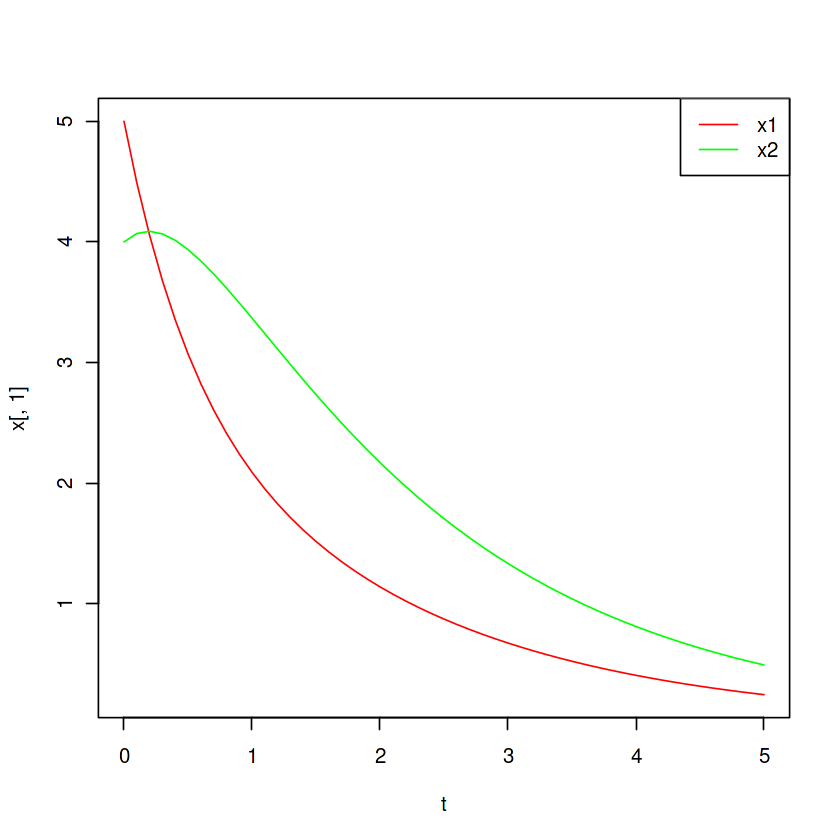

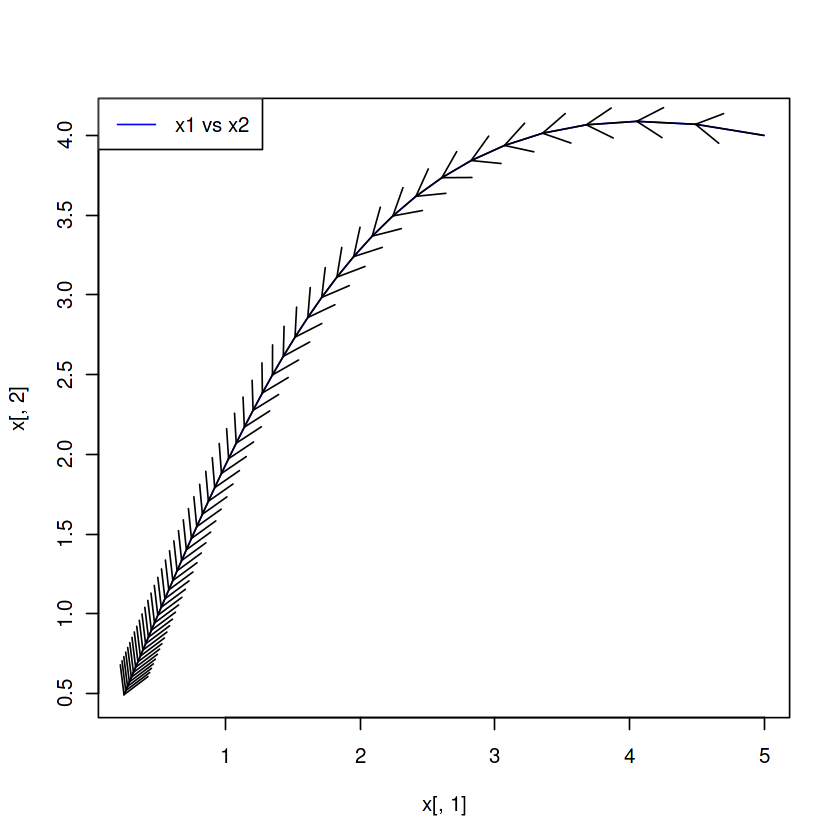

In [5]:
##################
# EXERCISE CELL
# The following code is complete. Add comments where indicated to explain what it does.
##################

library(matlib)

# right hand side matrix
A <- matrix(c(-1.5, 0.5,
             1, -1), nrow=2, byrow=TRUE)
xInit <- c(5,4)

# matrix eigenvalues and eigenvectors
res <- eigen(A)
eigenvals <- res$values
lambda1 <- eigenvals[1]
lambda2 <- eigenvals[2]
eigenvecs <- res$vectors
v1 <- eigenvecs[,1]
v2 <- eigenvecs[,2]

# time interval from 0 to 5 with stepsize 1/10
deltaT <- 0.1 # time stepsize
endTime <- 5 # end time
t <- seq(0,endTime,by=deltaT) # t values

# find the weights to rewrite the initial condition x0 = c1*v1 + c2*v2 as needed for the general solution
c <- inv(eigenvecs) %*% xInit 

x <- c()
for (i in c(1:length(t))){ # use general solution formula to compute trajectories
    tval <- t[i]
    x <- rbind(x,c[1]*v1*exp(lambda1*tval)+c[2]*v2*exp(lambda2*tval))
}

plot(t,x[,1], type='l', col='red') # plot x1 over time
points(t,x[,2], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(x[,1],x[,2], type='l', col='blue') # plot x1 vs x2
s <- seq(nrow(x)-1)
arrows(x[s,1],x[s,2],x[s+1,1],x[s+1,2],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot

For nonlinear systems, approximate solutions are needed. Below, the deSolve R package is used for the above linear system. Results match the exact solution as expected.

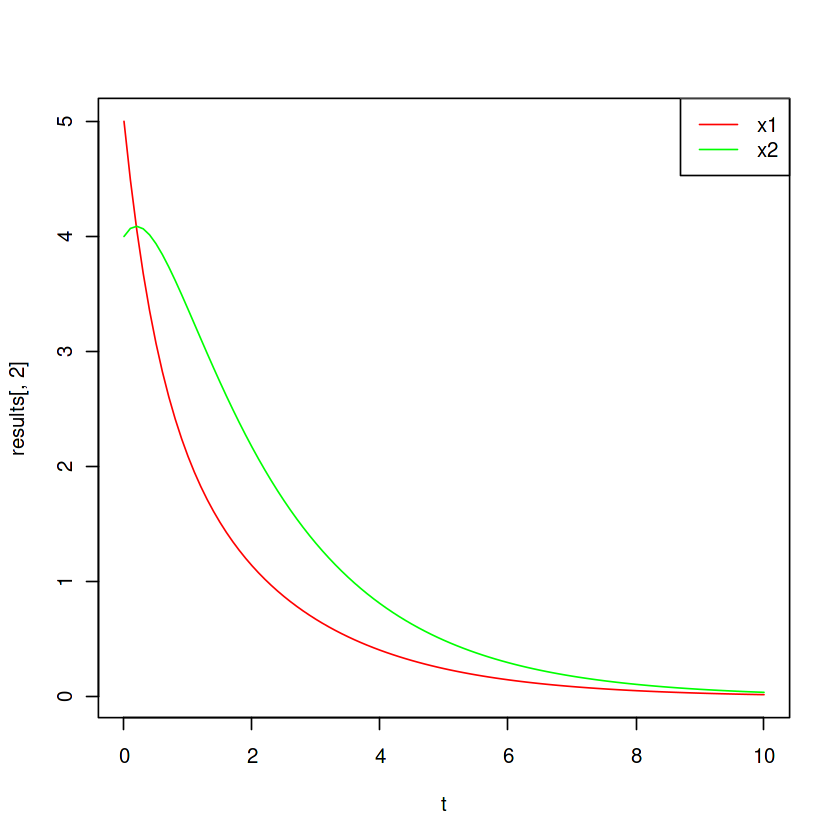

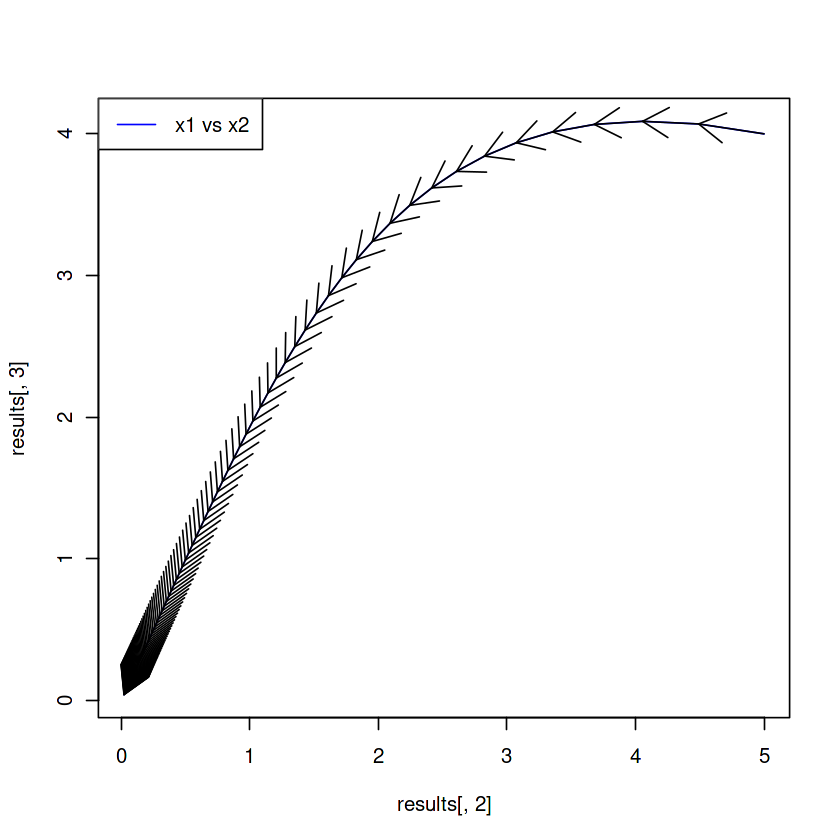

In [6]:
##################
# EAMPLE CELL
# There is no need to code anything here
##################

library(deSolve) # differential equation solver R package

RHSfun2 <- function(t, y, parms){ # right hand side of system of differential equations, formatted to work with deSolve routine
    with(as.list(c(y, parms)),{
        dx1 <- -1.5*x1+0.5*x2
        dx2 <- x1-x2
        return(list(c(dx1, dx2)))
    })
}

deltaT <- 0.1 # time stepsize
endTime <- 10 # end time
t <- seq(0,endTime,by=deltaT) # t values

y <- c(x1 = 5, x2 = 4) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red') # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot

Use the the below coding block and the ode() function of the deSolve R package to solve the below linear system of differential equations. 
$$
\begin{cases}
\frac{dx_1}{dt} = 4x_1-5x_2 \\
\frac{dx_2}{dt} = -2x_1+x_2 
\end{cases}
$$
Find solutions for 4 initial conditions, each starting in a different quadrant of the $x_1 x_2$-plane.



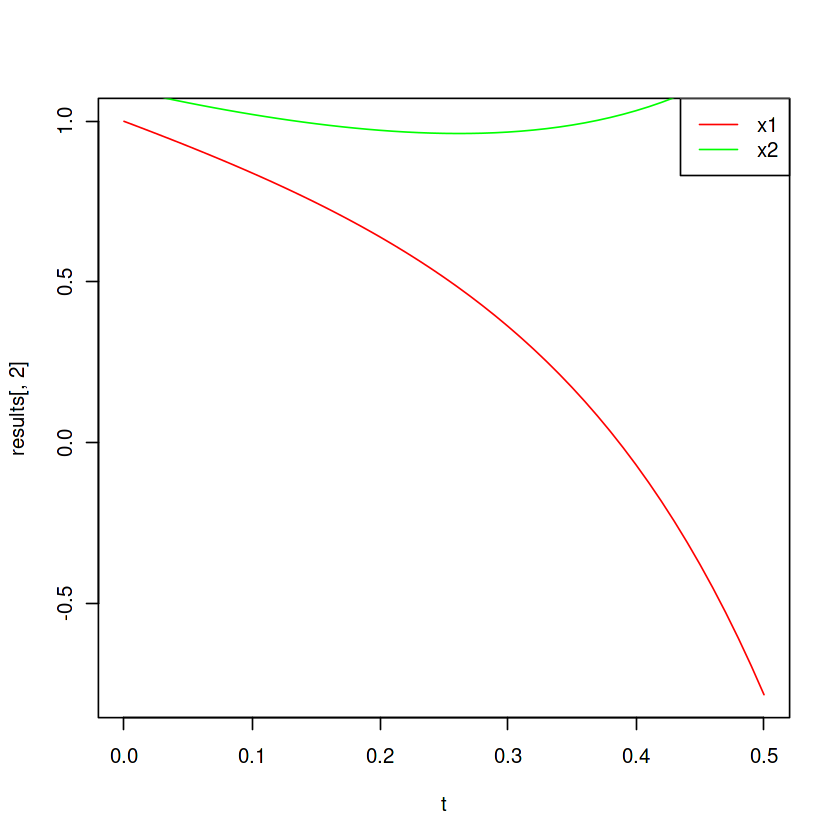

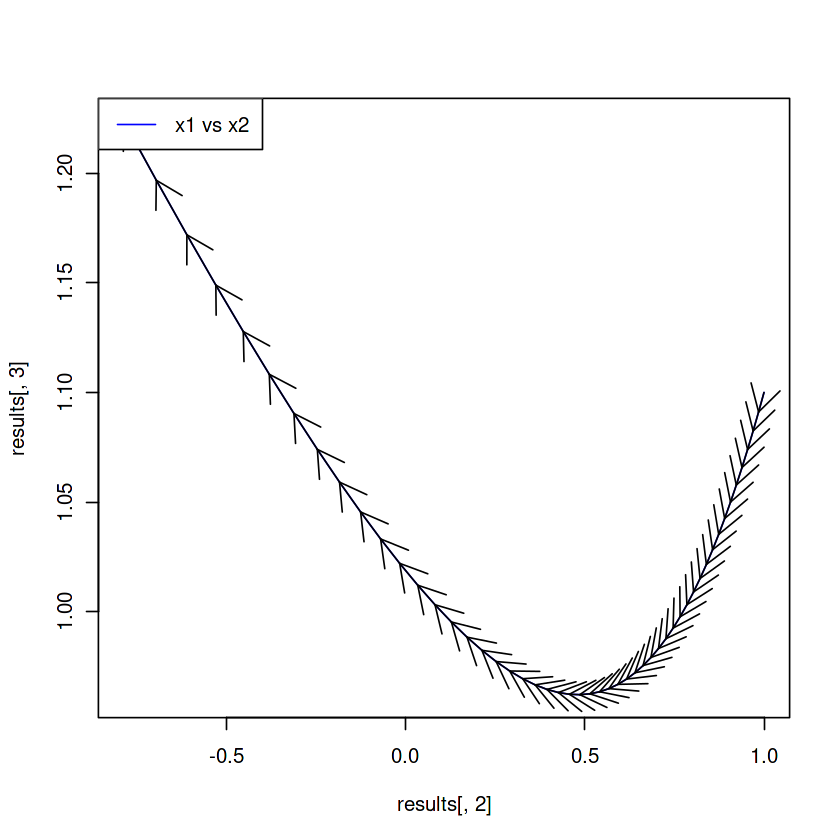

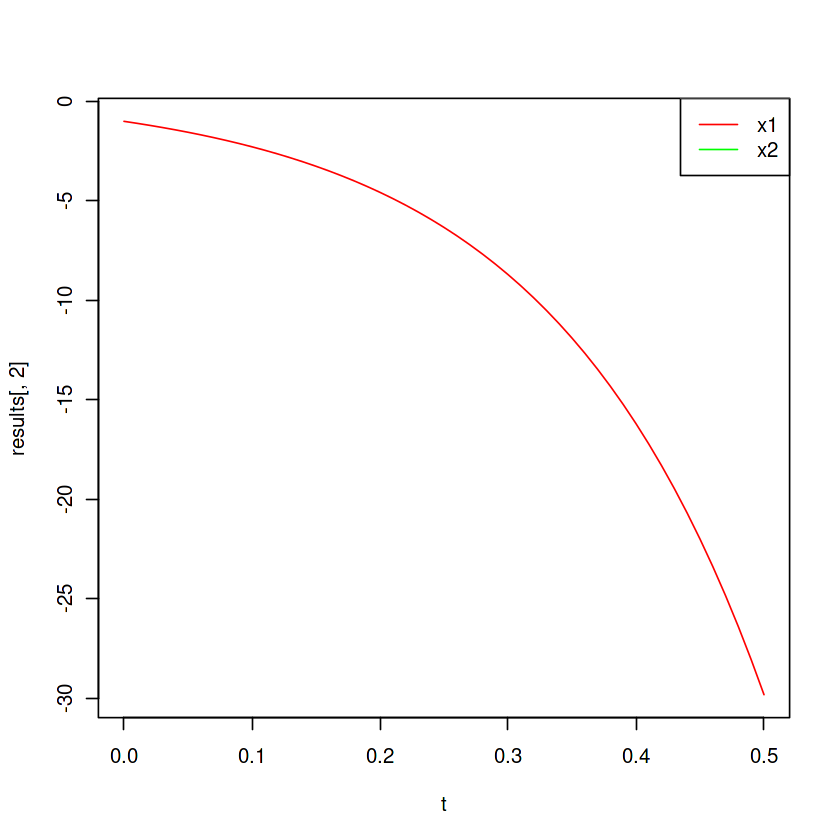

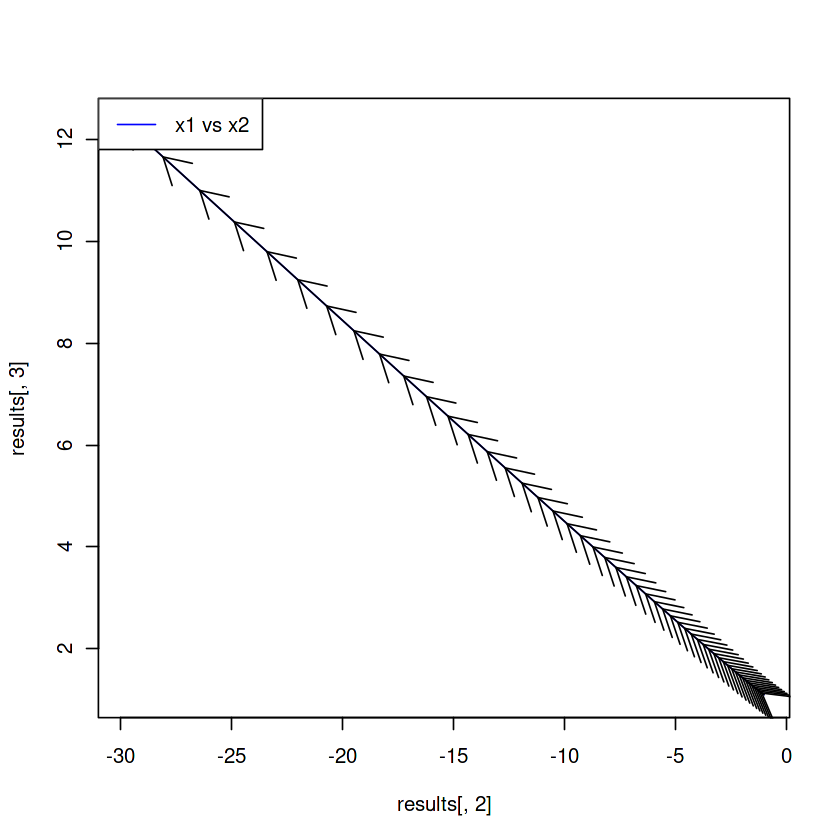

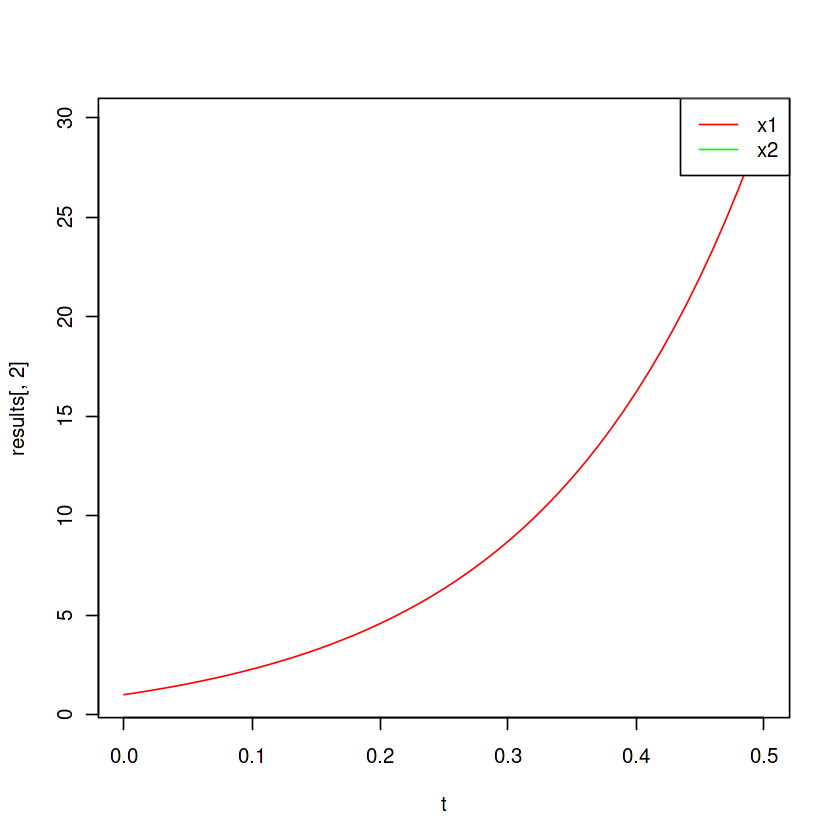

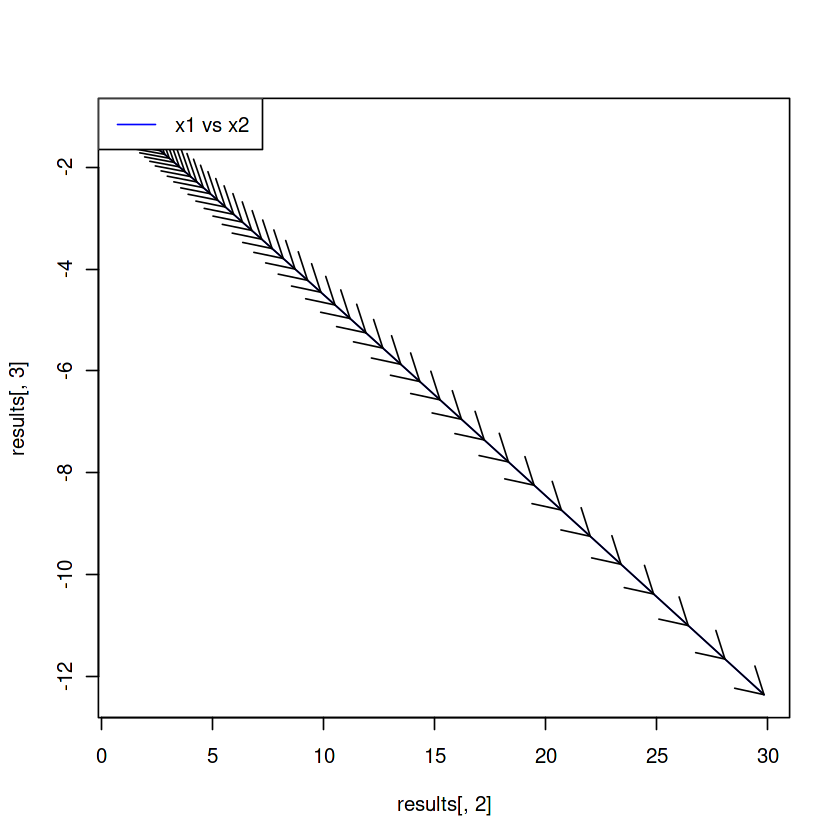

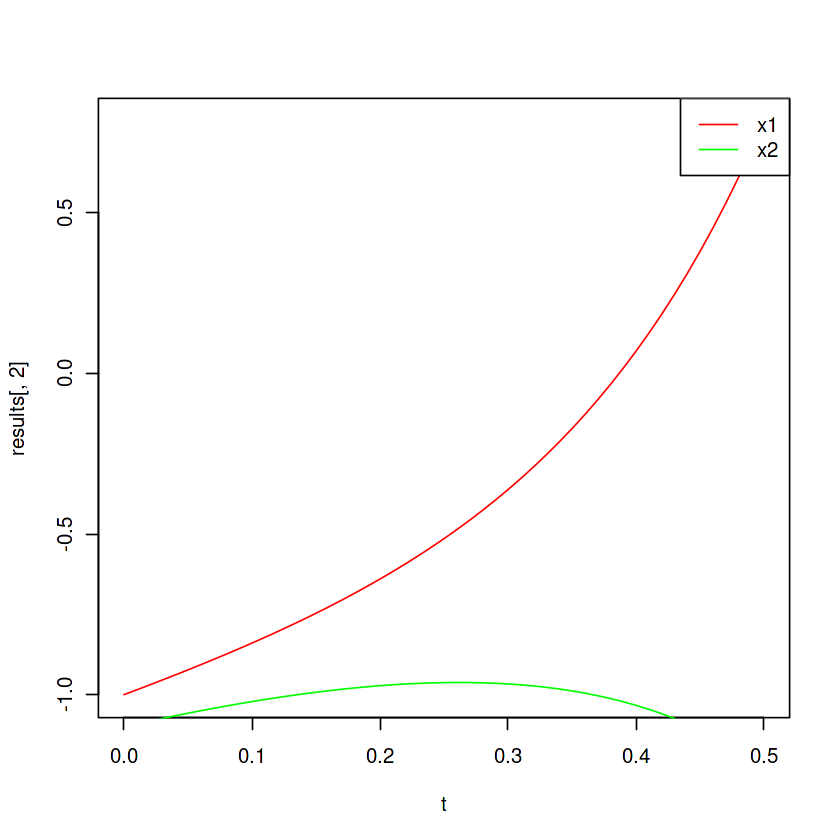

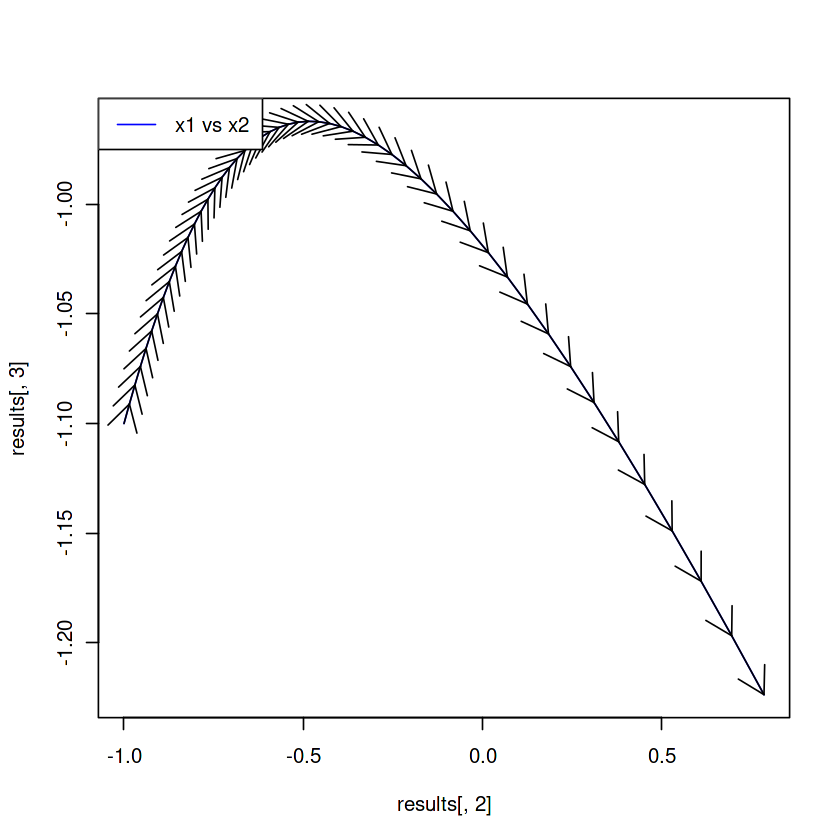

In [7]:
##################
# EXERCISE CELL
##################

##################
# INSERT YOUR CODE HERE


RHSfun2 <- function(t, y, parms){ # right hand side of system of differential equations, formatted to work with deSolve routine
    with(as.list(c(y, parms)),{
        dx1 <- 4*x1-5*x2
        dx2 <- -2*x1+x2
        return(list(c(dx1, dx2)))
    })
}

deltaT <- 0.01 # time stepsize
endTime <- .5 # end time
t <- seq(0,endTime,by=deltaT) # t values

########################
y <- c(x1 = 1, x2 = 1.1) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red') # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot

##################
########################
y <- c(x1 = -1, x2 = 1.1) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red') # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot

##################
########################
y <- c(x1 = 1, x2 = -1.1) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red') # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot

##################
########################
y <- c(x1 = -1, x2 = -1.1) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red') # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot

##################

Use the below coding block to find eigenvalues and eigenvectors of the matrix for this system.

In [8]:
##################
# EXERCISE CELL
##################

##################
# INSERT YOUR CODE HERE


# right hand side matrix
A <- matrix(c(4, -5,
             -2, 1), nrow=2, byrow=TRUE)

# matrix eigenvalues and eigenvectors
res <- eigen(A)
print(res)

##################

eigen() decomposition
$values
[1]  6 -1

$vectors
           [,1]      [,2]
[1,]  0.9284767 0.7071068
[2,] -0.3713907 0.7071068



#### Explanation of Exercise 2

Explain your findings in the above two coding blocks. It also may be useful to explore a more interactive version of this graphing via the website https://aeb019.hosted.uark.edu/pplane.html

INSERT YOUR EXPLANATION HERE



## Part 3: Approximate solutions to nonlinear systems, Exercise 3

Here we explore the concept of a nonlinear system differential equation by
- Finding approximate solutions using an R library
- Characterizing equilibrium behavior

#### Exercise 3: Predator-prey and the  Lotka-Volterra equations

Read about a famous nonlinear system of differential equations: https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

This system is not linear since the right hand side cannot be written as a matrix times a vector. In this case, approximate solutions are the best option. As was done above, use the ode() function of the deSolve R package to visualize solutions to this system. Use 4 differential initial conditions. Use parameters as chosen here: https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations#Phase-space_plot_of_a_further_example

Linear approximations to nonlinear models are used to analyze fix points of these systems. Read here for details: [https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra\_equations\#Stability\_of\_the\_fixed\_points](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations#Stability_of_the_fixed_points)



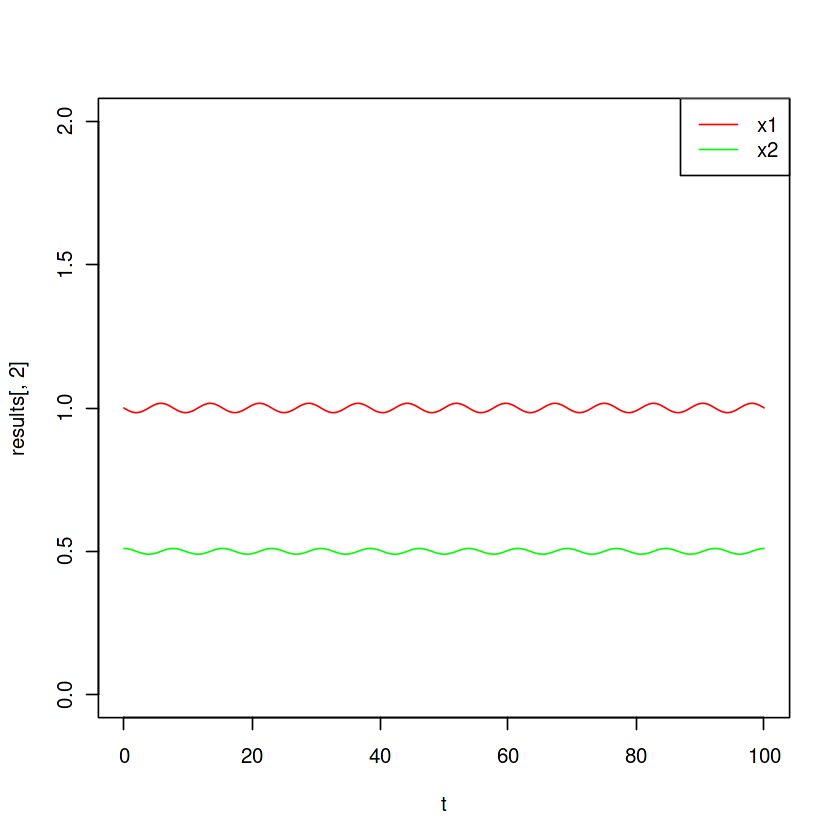

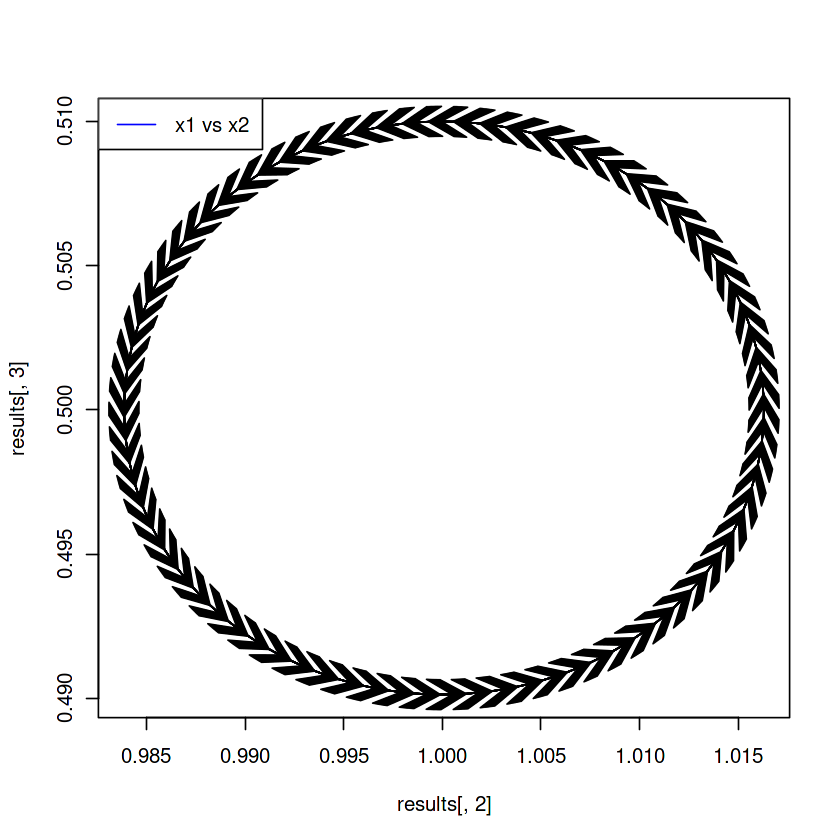

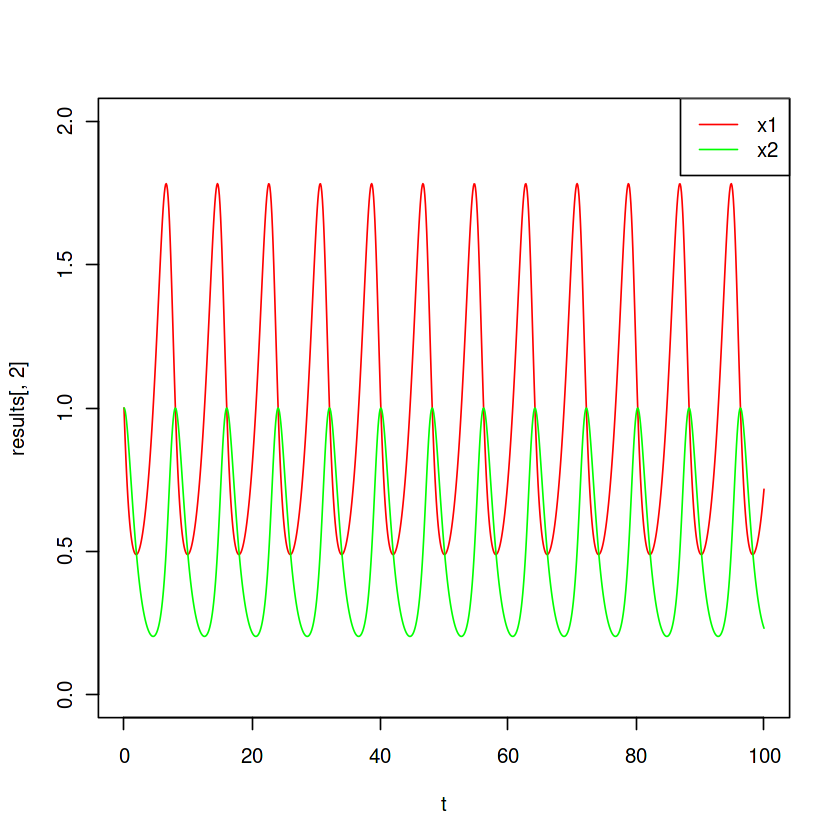

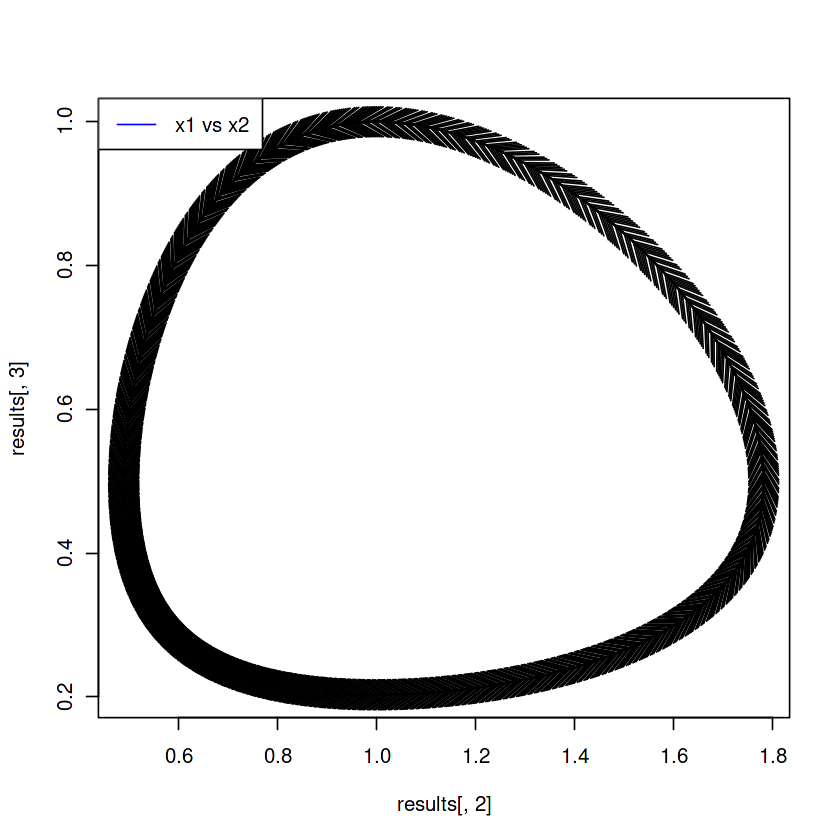

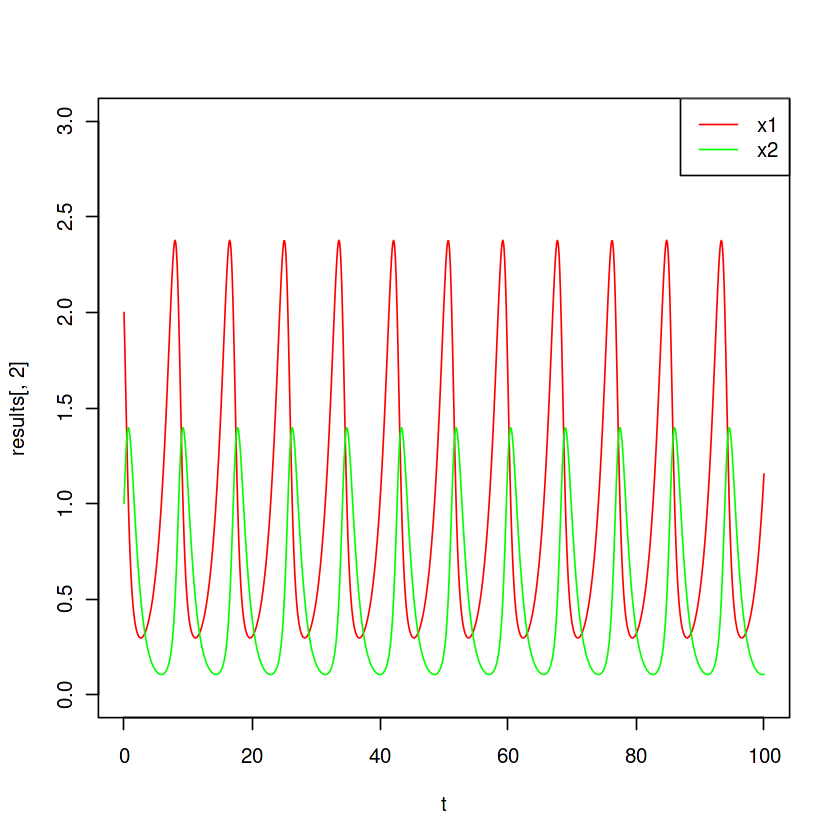

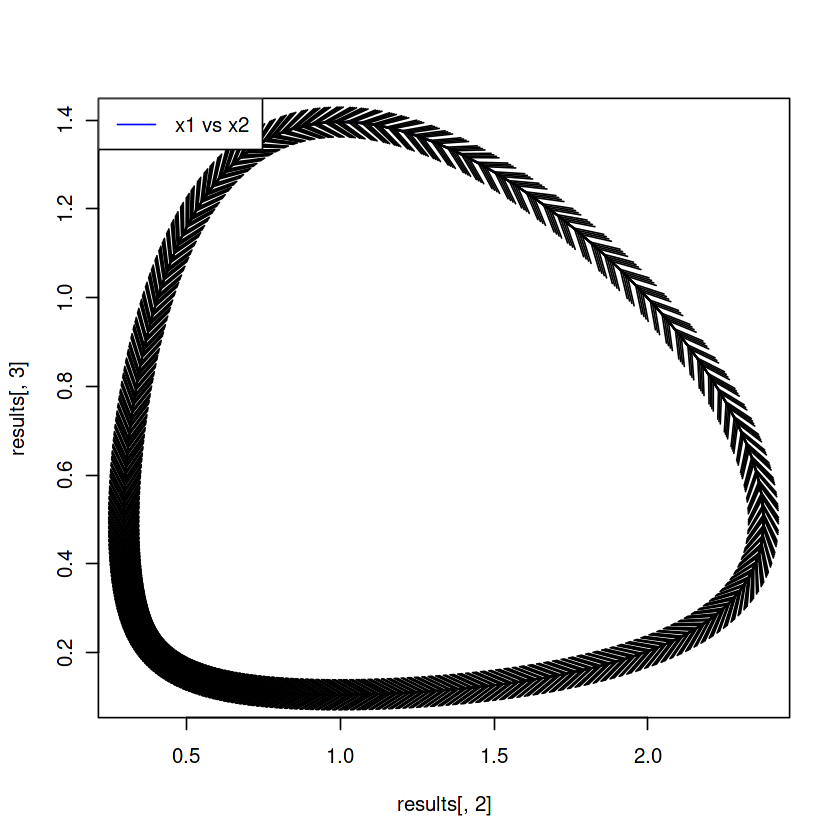

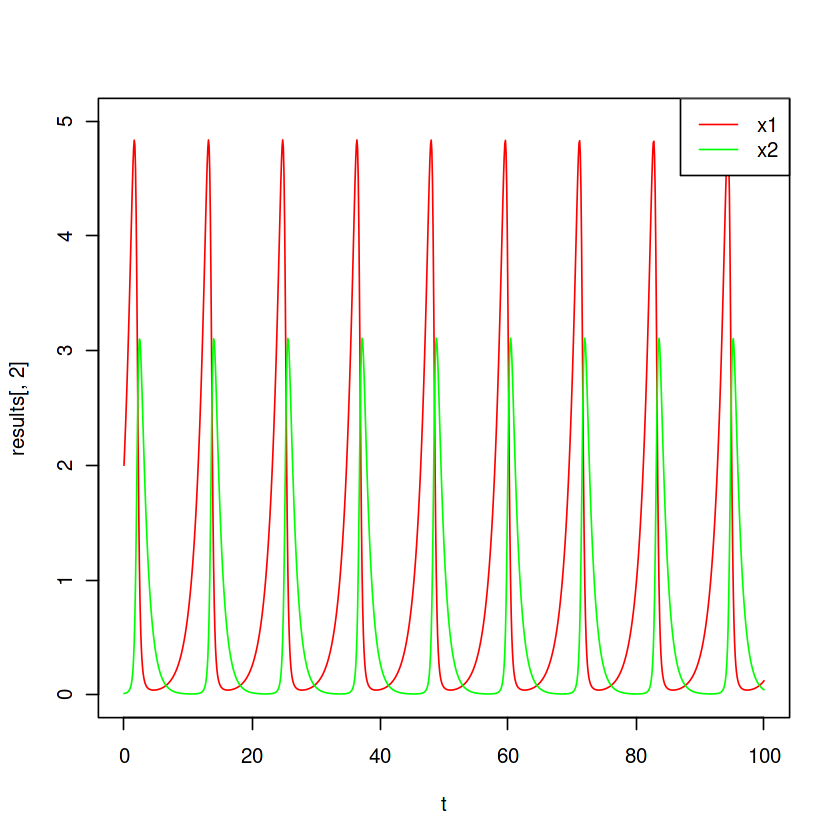

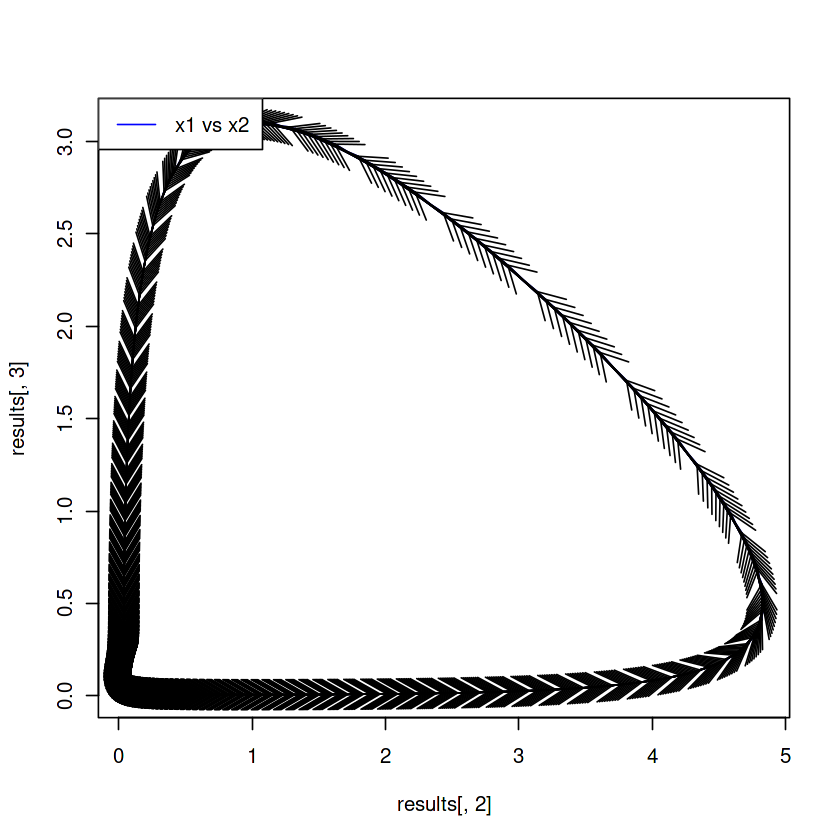

In [9]:
##################
# EXERCISE CELL
##################

##################
# INSERT YOUR CODE HERE


RHSfun2 <- function(t, y, parms){ # right hand side of system of differential equations, formatted to work with deSolve routine
    with(as.list(c(y, parms)),{
        alpha <- 2/3
        beta <- 4/3
        gamma <- 1
        delta <- 1
        dx1 <- alpha*x1-beta*x1*x2
        dx2 <- delta*x1*x2-gamma*x2
        return(list(c(dx1, dx2)))
    })
}

deltaT <- 0.1 # time stepsize
endTime <- 100 # end time
t <- seq(0,endTime,by=deltaT) # t values

########################
y <- c(x1 = 1, x2 = .51) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red', ylim = c(0,2)) # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot


########################
y <- c(x1 = 1, x2 = 1) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red', ylim = c(0,2)) # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot


##################


########################
y <- c(x1 = 2, x2 = 1) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red', ylim = c(0,3)) # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot

########################
y <- c(x1 = 2, x2 = .01) # initial conditions
parms <- c() # parameters needed for ode() function
results <- ode(y = y, times = t, func = RHSfun2, parms = parms) # ode solver routine

plot(t,results[,2], type='l', col='red', ylim = c(0,5)) # plot x1 over time
points(t,results[,3], type='l', col='green') # add x2 plot
legend("topright", c("x1", "x2"), col=c("red", "green"), lty=1) # add legend to plot

plot(results[,2],results[,3], type='l', col='blue') # plot approximate solutions together
s <- seq(nrow(results)-1)
arrows(results[s,2],results[s,3],results[s+1,2],results[s+1,3],cex=.5)
legend("topleft", c("x1 vs x2"), col=c("blue"), lty=1) # add legend to plot


##################

#### Explanation of Exercise 3

Explain your findings in the above coding block. 
INSERT YOUR EXPLANATION HERE